# 로즈데이와 어버이날의 검색 트랜드로 본 꽃 관심과 기념일간의 관계 분석

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## (1) 데이터 읽기

In [51]:
DIR = './Data_Inuk/'
ggJpRc = pd.read_csv(DIR+'google_japan_rc.csv', header=1)
ggUsaRc = pd.read_csv(DIR+'google_usa_rc.csv', header=1)
naKorRc = pd.read_excel(DIR+'naver_korea_rc.xlsx',header=6)
naKorPb = pd.read_excel(DIR+'naver_korea_pb.xlsx',header=6)
naShopFlower = pd.read_csv(DIR+'naver_shop_flower.csv', header=7)
naShopRc = pd.read_csv(DIR+'naver_shop_rc.csv', header=7)
dfList = [ggJpRc, ggUsaRc, naKorPb, naKorPb, naShopFlower, naShopRc]

c:\Users\SIU\anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SIU\anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [52]:
ggJpRc.head()

,주,カーネーション: (일본),バラ: (일본)
0,2021-07-11,4,38
1,2021-07-18,4,35
2,2021-07-25,4,33
3,2021-08-01,5,32
4,2021-08-08,5,34


In [53]:
ggUsaRc.head()

,주,rose day: (미국),carnation: (미국)
0,2021-07-11,22,62
1,2021-07-18,21,57
2,2021-07-25,20,61
3,2021-08-01,23,57
4,2021-08-08,26,70


In [54]:
naKorPb.head()

,날짜,벚꽃,날짜.1,핑크뮬리
0,2021-07-10,0.81980,2021-07-10,0.69495
1,2021-07-11,0.84989,2021-07-11,0.75362
2,2021-07-12,1.01836,2021-07-12,0.63929
3,2021-07-13,1.04845,2021-07-13,0.61673
4,2021-07-14,1.05145,2021-07-14,0.66336


In [55]:
naKorRc.head()

,날짜,장미,날짜.1,카네이션
0,2021-07-10,2.09376,2021-07-10,0.54848
1,2021-07-11,2.01738,2021-07-11,0.53220
2,2021-07-12,2.19895,2021-07-12,0.49714
3,2021-07-13,2.05870,2021-07-13,0.46959
4,2021-07-14,2.02239,2021-07-14,0.48462


In [56]:
naShopFlower.head()

,날짜,원예/식물
0,2021-07-10,38
1,2021-07-11,40
2,2021-07-12,38
3,2021-07-13,38
4,2021-07-14,36


In [57]:
naShopRc.head()

,날짜,장미,카네이션
0,2021-07-10,1,0
1,2021-07-11,1,0
2,2021-07-12,1,0
3,2021-07-13,0,0
4,2021-07-14,1,0


## (2) 데이터 전처리

### (2-1) 데이터 정제

#### (2-1-1) 결측치 확인

In [58]:
# 데이터프레임 리스트에서 결측치 확인해주는 함수
def missingVal(dflist):
    for i in dflist:
        print(f'{i.isnull().sum()}', '\n')

In [59]:
missingVal(dfList)

주                0
カーネーション: (일본)    0
バラ: (일본)         0
dtype: int64 

주                  0
rose day: (미국)     0
carnation: (미국)    0
dtype: int64 

날짜      0
벚꽃      0
날짜.1    0
핑크뮬리    0
dtype: int64 

날짜      0
벚꽃      0
날짜.1    0
핑크뮬리    0
dtype: int64 

날짜       0
원예/식물    0
dtype: int64 

날짜      0
장미      0
카네이션    0
dtype: int64 



### (2-2) 데이터 표준화

In [60]:
# 해외 데이터 한국어로 정리
ggJpRc = ggJpRc.rename(columns={'주': '날짜', 'カーネーション: (일본)': '카네이션', 'バラ: (일본)': '장미'})
ggUsaRc = ggUsaRc.rename(columns={'주': '날짜', 'rose day: (미국)': '장미', 'carnation: (미국)': '카네이션'})

In [61]:
# 필요없는 중복컬럼 정리
naKorPb = naKorPb.drop(columns='날짜.1')
naKorRc = naKorRc.drop(columns='날짜.1')

In [62]:
# 날짜 컬럼 datetime으로 바꿔주는 함수
def makeDatetime(*df:pd.DataFrame):
    for i in df:
        i['날짜'] = pd.to_datetime(i['날짜'])

In [63]:
# 함수실행
makeDatetime(ggJpRc, ggUsaRc, naKorPb, naKorPb, naShopFlower, naShopRc)

In [64]:
# df의 날짜컬럼 한달단위로 나눈 리스트 만들어주는 함수
def makeDateList(df:pd.DataFrame):
    mr = pd.date_range(start=df['날짜'].min(), end=df['날짜'].max(), freq='M')
    return list(mr.astype(str))

### (2-3) 데이터 정규화

In [68]:
# 날짜를 제외한 컬럼 데이터를 정규화시켜서 원래 df에 붙여주는 함수
def makeNomal(df:pd.DataFrame):
    norDF = df.drop(columns='날짜')
    colList = list(norDF.columns)
    for i in colList:
        norDF[i + '_nor'] = norDF[i].apply(lambda x: (x - norDF[i].min()) / (norDF[i].max() - norDF[i].min()))
    result = pd.concat([df['날짜'], norDF], axis=1)
    return result

## (3) 데이터 추출 및 시각화

### (3-1) 한국에서의 장미와 카네이션 검색 트랜드

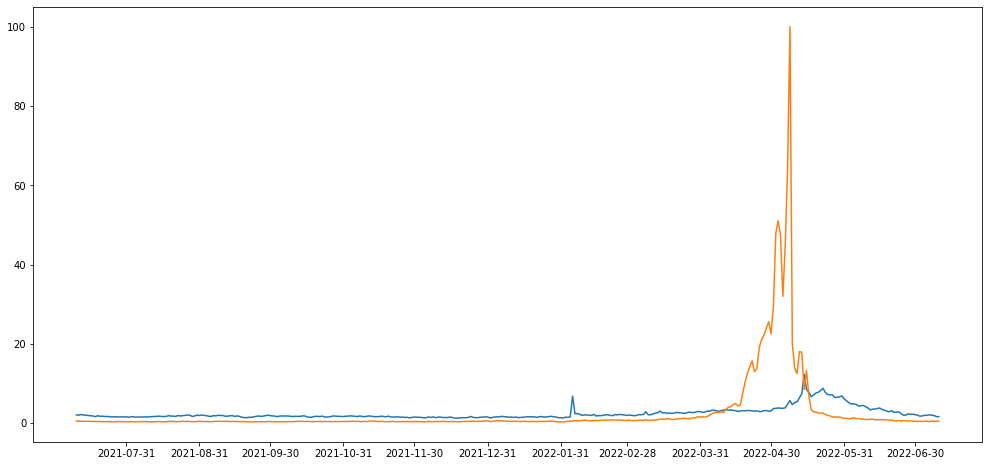

In [66]:
plt.figure(figsize=(17,8))
plt.plot(naKorRc['날짜'], naKorRc['장미'])
plt.plot(naKorRc['날짜'], naKorRc['카네이션'])
plt.xticks(makeDateList(naKorRc))
plt.show()

### (3-2) 